In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# US Population Dataset

The following dataset is downloaded from the Federal Reserve Economic Database FRED (https://fred.stlouisfed.org/series/POPTHM).

In [37]:
uspop = pd.read_csv("POPTHM-Jan2025FRED.csv")
print(uspop.head(10))
print(uspop.tail(10))
print(uspop.shape)

  observation_date  POPTHM
0       1959-01-01  175818
1       1959-02-01  176044
2       1959-03-01  176274
3       1959-04-01  176503
4       1959-05-01  176723
5       1959-06-01  176954
6       1959-07-01  177208
7       1959-08-01  177479
8       1959-09-01  177755
9       1959-10-01  178026
    observation_date  POPTHM
781       2024-02-01  336306
782       2024-03-01  336423
783       2024-04-01  336550
784       2024-05-01  336687
785       2024-06-01  336839
786       2024-07-01  337005
787       2024-08-01  337185
788       2024-09-01  337362
789       2024-10-01  337521
790       2024-11-01  337669
(791, 2)


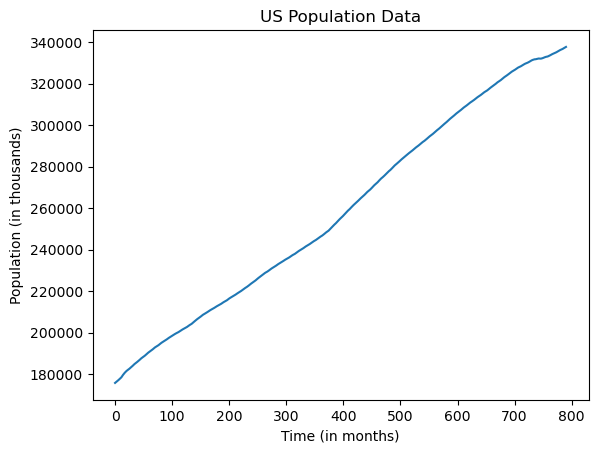

In [38]:
plt.plot(uspop['POPTHM'])
plt.xlabel("Time (in months)")
plt.ylabel("Population (in thousands)")
plt.title("US Population Data")
plt.show()

## Problem 1 
Fit a simple linear regression model to the data. Interpret the estimated intercept and slope.

In [39]:
import statsmodels.api as sm

t = np.arange(1, len(uspop['POPTHM']) + 1) 
X = sm.add_constant(t)

lin_model = sm.OLS(uspop['POPTHM'], X).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 POPTHM   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.422e+05
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:54:49   Log-Likelihood:                -7394.9
No. Observations:                 791   AIC:                         1.479e+04
Df Residuals:                     789   BIC:                         1.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.746e+05    198.060    881.427      0.0

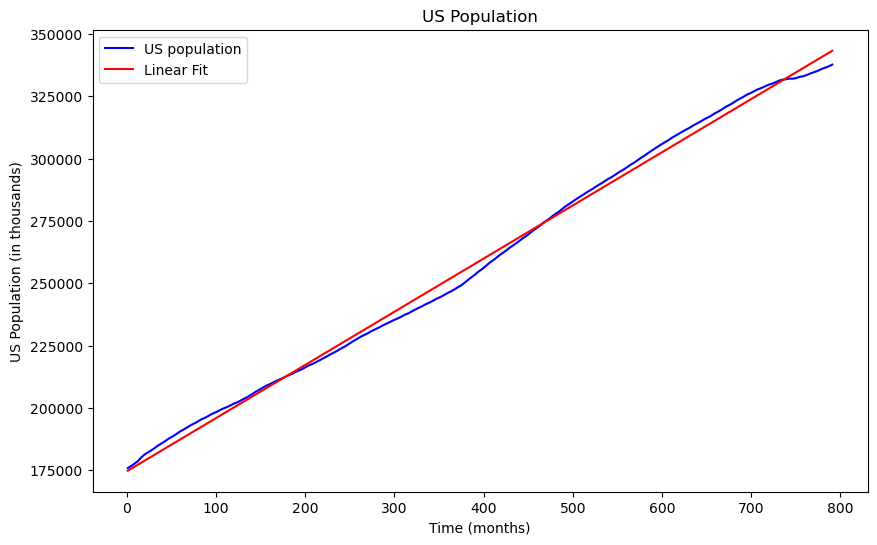

In [40]:
# Plot the original dataset along with the fitted values
plt.figure(figsize = (10, 6))
plt.plot(t, uspop['POPTHM'], label = 'US population', color = 'blue')
plt.plot(t, lin_model.fittedvalues, label = 'Linear Fit', color = 'red')
plt.xlabel("Time (months)")
plt.ylabel("US Population (in thousands)")
plt.title("US Population")
plt.legend()
plt.show()

# USA Accidents Dataset

This dataset was inbuilt in R. I have saved it as "USAccDeaths.csv". 

In [41]:
USAccDeaths = pd.read_csv("USAccDeaths.csv")
print(USAccDeaths.head(10))
print(USAccDeaths.tail(10))
print(USAccDeaths.shape)

   Unnamed: 0      x
0           1   9007
1           2   8106
2           3   8928
3           4   9137
4           5  10017
5           6  10826
6           7  11317
7           8  10744
8           9   9713
9          10   9938
    Unnamed: 0      x
62          63   7791
63          64   8192
64          65   9115
65          66   9434
66          67  10484
67          68   9827
68          69   9110
69          70   9070
70          71   8633
71          72   9240
(72, 2)


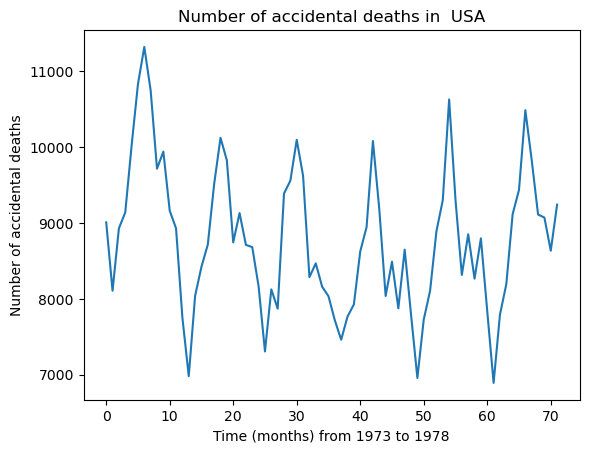

In [42]:
dt = USAccDeaths['x']
plt.plot(dt)
plt.xlabel("Time (months) from 1973 to 1978")
plt.ylabel("Number of accidental deaths")
plt.title("Number of accidental deaths in  USA")
plt.show()                

## Problem 2
Fit a sinusoids + quadratic multiple regression model to the data.

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     58.54
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           2.93e-26
Time:                        23:54:49   Log-Likelihood:                -519.15
No. Observations:                  72   AIC:                             1056.
Df Residuals:                      63   BIC:                             1077.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9957.8596    127.837     77.895      0.0

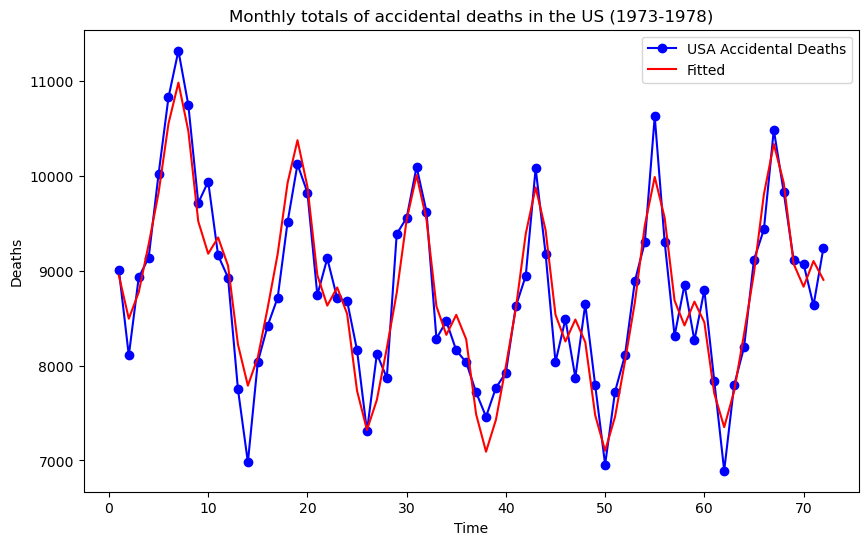

In [43]:
t = np.arange(1, len(dt) + 1)

f1, f2, f3 = 1, 2, 3
d = 12

v1 = np.cos(2 * np.pi * f1 * t/d)
v2 = np.sin(2 * np.pi * f1 * t/d)
v3 = np.cos(2 * np.pi * f2 * t/d)
v4 = np.sin(2 * np.pi * f2 * t/d)
v5 = np.cos(2 * np.pi * f3 * t/d)
v6 = np.sin(2 * np.pi * f3 * t/d)

v7 = t
v8 = t ** 2

X = np.column_stack([v1, v2, v3, v4, v5, v6, v7, v8])
X = sm.add_constant(X)

lin_mod = sm.OLS(dt, X).fit()
print(lin_mod.summary())

plt.figure(figsize = (10, 6))
plt.plot(t, dt, label = "USA Accidental Deaths", marker = 'o', linestyle = '-', color = 'blue')
plt.plot(t, lin_mod.fittedvalues, label = 'Fitted', color = 'red', linestyle = '-')
plt.xlabel("Time")
plt.ylabel("Deaths")
plt.title("Monthly totals of accidental deaths in the US (1973-1978)")
plt.legend()
plt.show()